<a href="https://colab.research.google.com/github/annyfan/550/blob/master/IFT_6758_HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1> IFT-6758 : Data Science  </h1></center>
<center><h2> Fall - 2020 </h2></center> 
<center><h3> Homework - 1</h3></center> 



[Notebook](https://colab.research.google.com/drive/10YQ90z1TM36VJE-1PQ1FnqgjNMpdfiqA) due October 11, 2020 at [23.59 EDT](https://www.worldtimebuddy.com/?qm=1&lid=6077243&h=6077243&date=2020-10-11&sln=23-24) as **PDF** on [Gradescope](https://www.gradescope.com/courses/179325/assignments/714271)


In [ ]:
#@title Imports (Run this cell first) { run: "auto" }
plotting_library = "matplotlib"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

# Uncomment this line below if using seaborn
#sns.set() 

%matplotlib inline

path = 'https://raw.githubusercontent.com/Jhelum-Ch/DataScience_IFT6758/gh-pages/media/{}'

## Data Wrangling

#### Q1

**7 points** = $(2 + 2 + 1 + 2)              $

Given below is the code to load a dataset with the population of different geographical regions in Canada. 

(a) Visualize the distribution of the `population` column using an appropriate histogram. Does the distribution resemble any well-known distribution? What aspect of the data causes this shape of the distribution?

(b) A common strategy is to transform the data to bring it closer to a better distribution. Try out the following transformations and *visually* determine if any of them lead it closer to another well-known distribution. **Name the distribution(s) if it is different from (a)**:

> 1.   $\sqrt{population}$
> 2.   $log_{10}(1+population)$

(c) What difference do you think the above `log` transfomation makes with `1 + population` as opposed to using just `population`?

(d) Try out the same `log` transfomation in (c) with different values of the base of the `log`. What difference do you observe when you change the base? 



In [ ]:
pop_df = pd.read_csv(path.format('canada-population.csv'))

**Answer** 

(a) This distribution resemble Pareto distribution or exponential distribution . The data is skewed. It has a large, dominated head(left side), large number of samples are there, then the number decays fast and many samples are spreaded in a long and thin tail(right side) far from the "head". 

Text(0.5, 1.0, 'population')

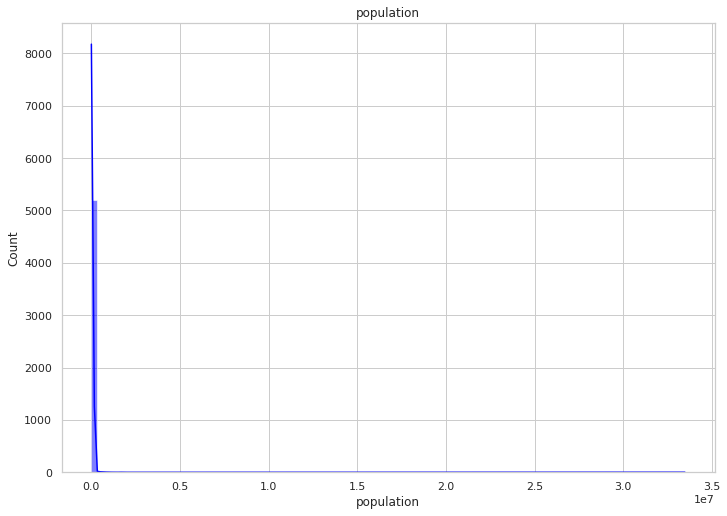

In [ ]:

#pop_df.hist('population', bins=100, figsize=(10,8),  color='blue',zorder=2, rwidth=0.9,alpha=0.6 )

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.histplot(pop_df['population'], bins=100,  color='blue' , kde=True, ax = ax)

g.set_title("population")

(b) The transformation 1 looks simular to (a), just a little bit flat and smoother.

The transformation 2 makes it look closer to Gaussian or Poisson distribution. 

Text(0.5, 1.05, 'Transform population')

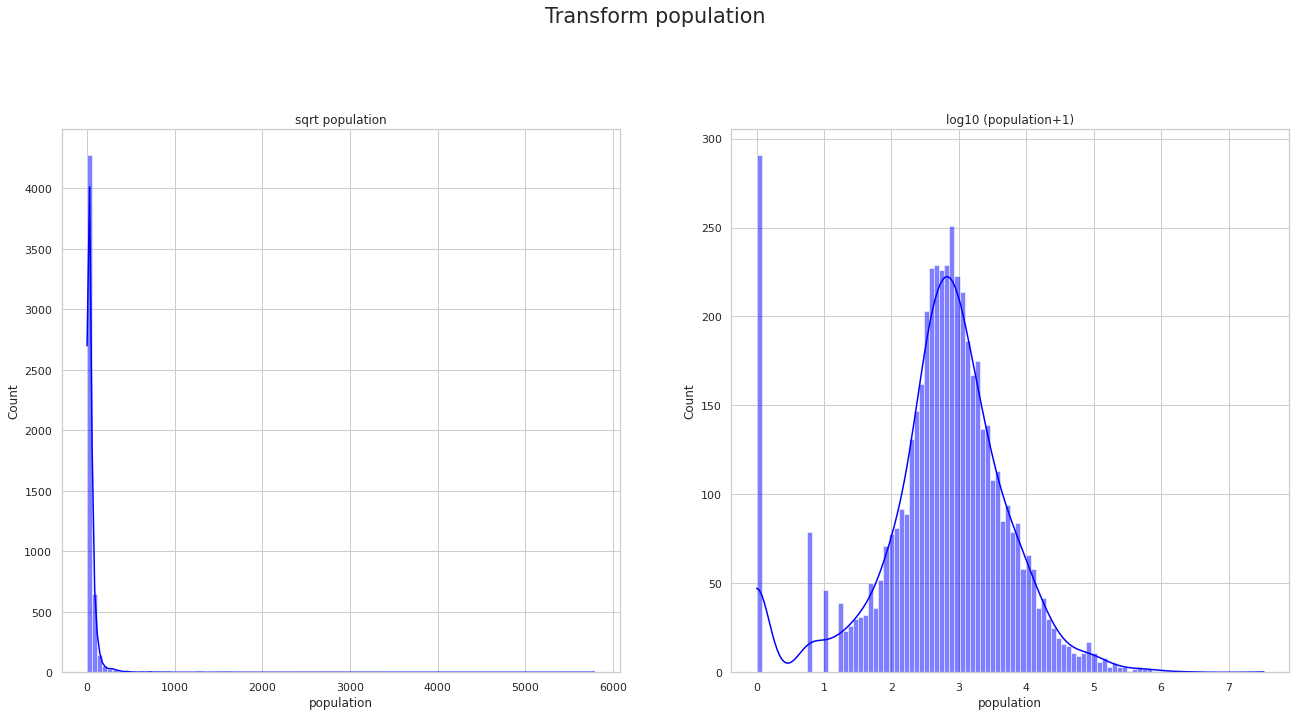

In [ ]:
# set up figure & axes
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(22,10),)

# drop sharex, sharey, layout & add ax=axes
g= sns.histplot(np.sqrt(pop_df['population']), bins=100,  color='blue' , kde=True, ax = axes[0])
axes[0].set_title("sqrt population")


g=sns.histplot(np.log10(pop_df['population']+1.), bins=100,  color='blue', kde=True, ax = axes[1])
axes[1].set_title("log10 (population+1)")


# set title and axis labels
plt.suptitle('Transform population', x=0.5, y=1.05, ha='center', fontsize='xx-large')


(c) Firstly, if we use population directely without +1, there will be errors, because there are some 0.0 in the poputation column. log_10 of 0 is invalid. Secondly, this is the histogram plot of population, the value under 0 does not make any senses, so log(1 + popution) will always be greater or equal to 0. This make this transformation meaningful and readable. 

In [ ]:
pop_df['population'] [(pop_df['population'] == 0) ]

61      0.0
118     0.0
138     0.0
367     0.0
370     0.0
       ... 
5214    0.0
5222    0.0
5245    0.0
5248    0.0
5253    0.0
Name: population, Length: 291, dtype: float64

 (d) Tested log10, ln, log2, I observed, as the log base goes smaller, the plot shifts to the right along the x-axis, far from 0.  

Text(0.5, 1.05, 'Transform population')

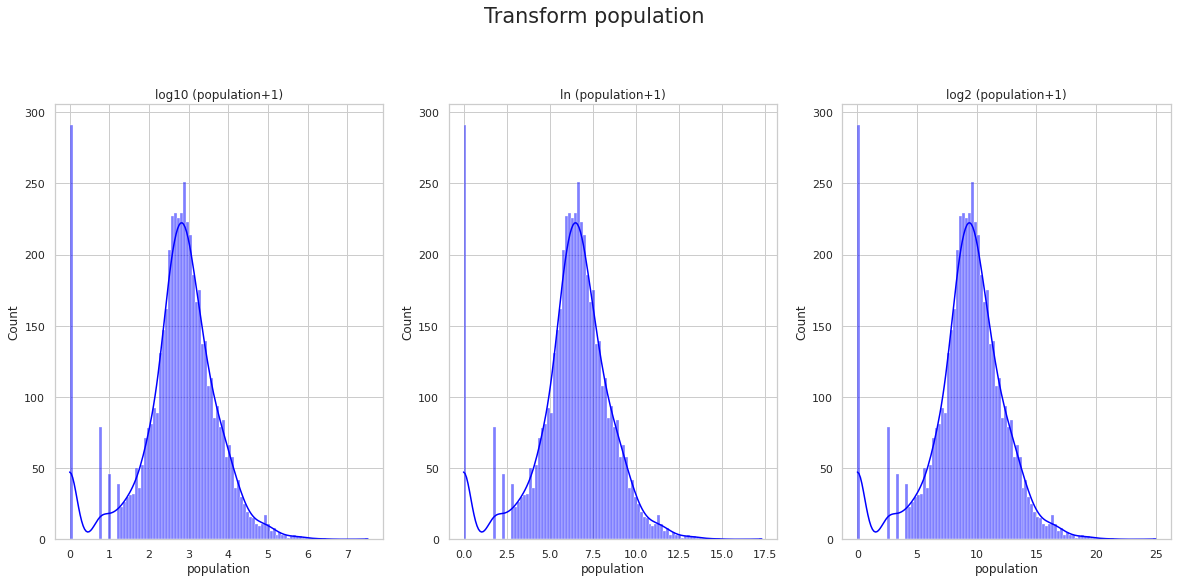

In [ ]:
# set up figure & axes
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(20,8),)

g=sns.histplot(np.log10(pop_df['population']+1.), bins=100,  color='blue', kde=True, ax = axes[0])
axes[0].set_title("log10 (population+1)")


g=sns.histplot(np.log(pop_df['population']+1.), bins=100,  color='blue', kde=True, ax = axes[1])
axes[1].set_title("ln (population+1)")


g=sns.histplot(np.log2(pop_df['population']+1.), bins=100,  color='blue', kde=True, ax = axes[2])
axes[2].set_title("log2 (population+1)")



# set title and axis labels
plt.suptitle('Transform population', x=0.5, y=1.05, ha='center', fontsize='xx-large')


## Exploratory Analysis

####Q2

**9 points** = $(1 + 1.5 + 3 + 2 + 1.5)$

The next cell loads the fancy penguins dataset into a dataframe.

(a) Remove the rows that have `NaN` values *for all* numerical features except `body_color`. 

(b) In the result obtained in (a), how many penguins have no `body_color` assigned? Replace these `body_color` entries with a string type `unknown` 

(c) Visualize this data in a pair plot and guess the possible `body_color` of the penguins that have no `body_color` assigned.**Justify** your choice.

(d) Load the dataset afresh again. Replace the `NaN` values present in the the features with their respective *in-class means* for all numerical fields. Example: The  `bill_depth_mm` of an `Adelie	Torgersen` penguins replaced with the mean of `bill_depth_mm` of all the other `Adelie	Torgersen` entries, and so on for all fields. 

(e) Plot the pair plot of this transformed dataset. Make any comment(s) on what you observe here compared to (c).




In [ ]:
penguins = pd.read_csv(path.format('fancy-penguins.csv'))

In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   body_color         333 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


**Answer** 

(a)  “that have NaN values for all numerical features except body_color “, meaning don’t care about what body_color is. If the numerical features are all NaN, get rid of it.

e.g. [NaN, Nan, Nan, Nan, grey], [NaN, Nan, Nan, Nan, NaN]

In [ ]:
numericals = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
penguins.dropna(how='all',inplace = True, subset = numericals)
print(penguins)

     Unnamed: 0 species     island  ...  flipper_length_mm  body_mass_g  body_color
0             0  Adelie  Torgersen  ...              181.0       3750.0       black
1             1  Adelie  Torgersen  ...              186.0       3800.0        grey
2             2  Adelie  Torgersen  ...              195.0       3250.0        grey
4             4  Adelie  Torgersen  ...              193.0       3450.0        grey
5             5  Adelie  Torgersen  ...              190.0       3650.0       black
..          ...     ...        ...  ...                ...          ...         ...
338         338  Gentoo     Biscoe  ...              214.0       4925.0        grey
340         340  Gentoo     Biscoe  ...              215.0       4850.0        grey
341         341  Gentoo     Biscoe  ...              222.0       5750.0       black
342         342  Gentoo     Biscoe  ...              212.0       5200.0        grey
343         343  Gentoo     Biscoe  ...              213.0       5400.0     

(b) In the result obtained in (a), how many penguins have no body_color assigned? Replace these body_color entries with a string type unknown

In [ ]:
print('There are ', len(penguins[penguins['body_color'].isna()]),' penguins have no body_color assigne' )
penguins[penguins['body_color'].isna()]

There are  9  penguins have no body_color assigne


,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,body_color
8,8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [ ]:
penguins['body_color'].fillna(value='unknown', inplace=True)

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,body_color
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,black
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,grey
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,grey
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,grey
5,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,black
...,...,...,...,...,...,...,...,...
338,338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,grey
340,340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,grey
341,341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,black
342,342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,grey


In [ ]:
print('There are ', len(penguins[penguins['body_color']=='unknown']),' penguins have unknown body_color assigne' )
penguins[penguins['body_color']=='unknown']

There are  9  penguins have unknown body_color assigne


,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,body_color
8,8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,unknown
9,9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,unknown
10,10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,unknown
11,11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,unknown
47,47,Adelie,Dream,37.5,18.9,179.0,2975.0,unknown
246,246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,unknown
286,286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,unknown
324,324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,unknown
336,336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,unknown


(c) Visualize this data in a pair plot and guess the possible body_color of the penguins that have no body_color assigned.Justify your choice.



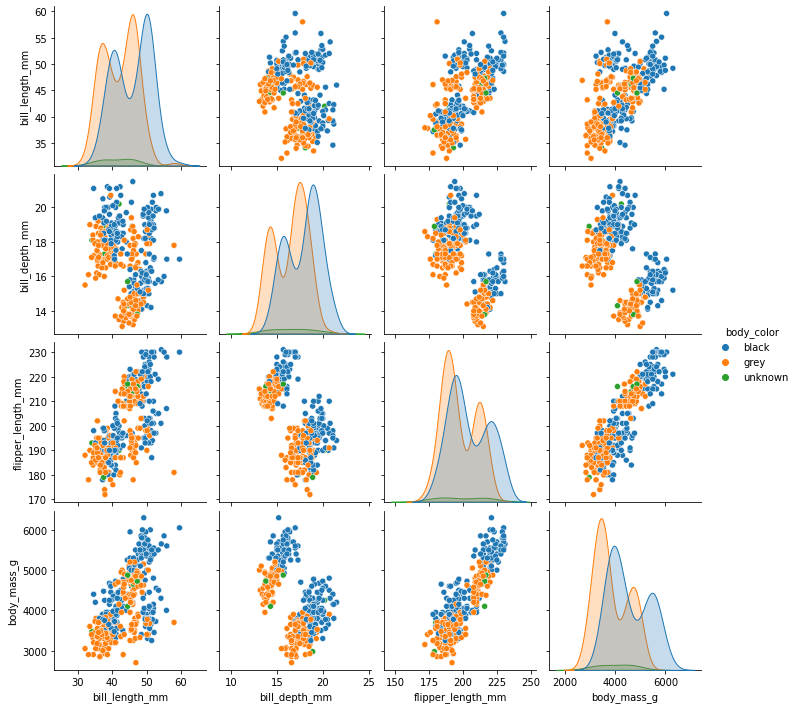

In [ ]:
sns.pairplot(penguins.drop(penguins.columns[[0]],  axis='columns'), hue="body_color")

I can see the green "unknown" points, I would classify them same as their neighbors. 

(d) Load the dataset afresh again. Replace the NaN values present in the the features with their respective in-class means for all numerical fields. Example: The bill_depth_mm of an Adelie Torgersen penguins replaced with the mean of bill_depth_mm of all the other Adelie Torgersen entries, and so on for all fields.



In [ ]:
penguins = pd.read_csv(path.format('fancy-penguins.csv'))

In [ ]:
# there are 2 samples have nan in the 
#numerical fields:'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'
numericals = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
penguins[penguins[numericals].isna().any(axis=1)]

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,body_color
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [ ]:
#observe the group mean, grouped by 'species','island'
penguins.groupby(['species','island']).mean()

Unnamed: 0  bill_length_mm  ...  flipper_length_mm  body_mass_g
species   island                                 ...                                
Adelie    Biscoe      68.590909       38.975000  ...         188.795455  3709.659091
          Dream       90.785714       38.501786  ...         189.732143  3688.392857
          Torgersen   64.884615       38.950980  ...         191.196078  3706.372549
Chinstrap Dream      185.500000       48.833824  ...         195.823529  3733.088235
Gentoo    Biscoe     281.500000       47.504878  ...         217.186992  5076.016260

[5 rows x 5 columns]

In [ ]:
# fill the NAN numerical fields with the group means
penguins[numericals] = penguins.groupby(['species','island'])[numericals].transform(lambda x: x.fillna( x.mean()))

In [ ]:
penguins[penguins.isna().any(axis=1)]

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,body_color
3,3,Adelie,Torgersen,38.950980,18.429412,191.196078,3706.372549,NaN
8,8,Adelie,Torgersen,34.100000,18.100000,193.000000,3475.000000,NaN
9,9,Adelie,Torgersen,42.000000,20.200000,190.000000,4250.000000,NaN
10,10,Adelie,Torgersen,37.800000,17.100000,186.000000,3300.000000,NaN
11,11,Adelie,Torgersen,37.800000,17.300000,180.000000,3700.000000,NaN
47,47,Adelie,Dream,37.500000,18.900000,179.000000,2975.000000,NaN
246,246,Gentoo,Biscoe,44.500000,14.300000,216.000000,4100.000000,NaN
286,286,Gentoo,Biscoe,46.200000,14.400000,214.000000,4650.000000,NaN
324,324,Gentoo,Biscoe,47.300000,13.800000,216.000000,4725.000000,NaN
336,336,Gentoo,Biscoe,44.500000,15.700000,217.000000,4875.000000,NaN


(e) Plot the pair plot of this transformed dataset. Make any comment(s) on what you observe here compared to (c).

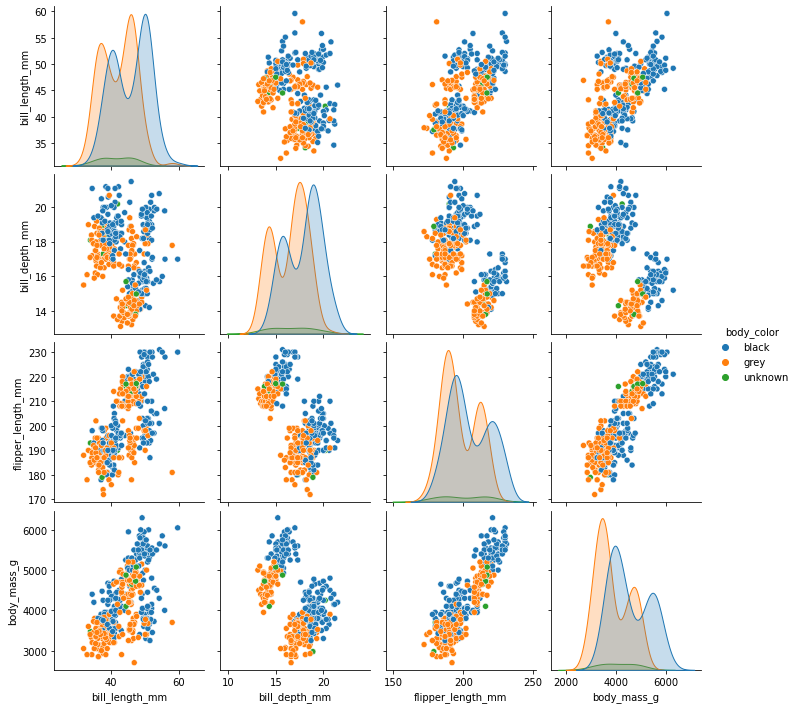

In [ ]:
sns.pairplot(penguins.drop(penguins.columns[[0]],  axis='columns').fillna('unknown'),  hue="body_color")

I can see the new points, and I donot find big difference here from  (c)

## Data Visualization

####Q3

**13 points** = $(3*1 + 3*2 + 3 + 1)              $




In this problem, the task is to visualize the data about the number of taxi pickups in a city at different time scales. The dataset contains details of taxi pickups during several months. 

Observe the datatype of the field indicating the trip start timestamp. A lot of information can be extracted from just that string.

(a) Extract the following from the trip start timestamp and add new columns to store them in the dataframe : 
* day of the month (1-31)
* day of the week (Monday-Sunday)
* hour of the day

(b) Produce suitable plots through code to observe the following relationships and give a single line comment about the taxi usage pattern of the city residents in the mentioned context. 

  1. The number of rides by day of the month.
  2. The number of rides by the day of the week. 
  3. The number of hourly rides during the day.
  
(c) On a single plot, depict the taxi usage during different times of the day for cash and credit card rides. Add a suitable legend and label the axes.  

(d) Overall it was noted that there were substantially more credit card rides than cash rides. Is this true throughout the day?

In [ ]:
trips = pd.read_csv(path.format('city-taxi.csv'))

In [ ]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   unique_key              20000 non-null  object 
 1   taxi_id                 20000 non-null  object 
 2   trip_start_timestamp    20000 non-null  object 
 3   trip_end_timestamp      20000 non-null  object 
 4   trip_seconds            6002 non-null   float64
 5   trip_miles              20000 non-null  float64
 6   pickup_census_tract     9 non-null      float64
 7   dropoff_census_tract    10 non-null     float64
 8   pickup_community_area   0 non-null      float64
 9   dropoff_community_area  0 non-null      float64
 10  fare                    20000 non-null  float64
 11  tips                    20000 non-null  float64
 12  tolls                   20000 non-null  float64
 13  extras                  20000 non-null  float64
 14  trip_total              20000 non-null

**Answer** 

(a) Extract the following from the trip start timestamp 


In [ ]:
trips['trip_start_timestamp']

0        2013-04-07 17:00:00+00:00
1        2013-04-07 17:00:00+00:00
2        2013-04-07 14:45:00+00:00
3        2013-04-20 18:45:00+00:00
4        2013-03-30 02:15:00+00:00
                   ...            
19995    2013-04-07 22:45:00+00:00
19996    2013-04-09 15:30:00+00:00
19997    2013-04-07 23:00:00+00:00
19998    2013-04-16 04:45:00+00:00
19999    2013-04-05 14:00:00+00:00
Name: trip_start_timestamp, Length: 20000, dtype: object

In [ ]:
# parse the timestamp to datetime objects
start_timestamp_series = pd.to_datetime(trips['trip_start_timestamp'], infer_datetime_format=True) 

In [ ]:
#add new columns to store them in the dataframe : day of the month (1-31)

trips['trip_start_month_day'] = start_timestamp_series.dt.day

In [ ]:
# add new columns to store them in the dataframe :  day of the week (Monday-Sunday)

trips['trip_start_week_day'] = start_timestamp_series.dt.day_name()

In [ ]:
#add new columns to store them in the dataframe : hour of the day
trips['trip_start_day_hour'] = start_timestamp_series.dt.hour

In [96]:
# observe the results
trips.sample(2)

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location,trip_start_month_day,trip_start_week_day,trip_start_day_hour
11406,e42ea8dadab80f60be6c2230b5ce1dc730472829,5f7765c52d980d9aa8ec18e22238a879028bcc404188d0...,2013-03-25 09:15:00+00:00,2013-03-25 09:15:00+00:00,60.0,0.0,NaN,NaN,NaN,NaN,15.45,4.55,0.0,0.0,20.00,Credit Card,Taxi Affiliation Services,NaN,NaN,NaN,NaN,NaN,NaN,25,Monday,9
19890,225fcd5c7a9d744cddb3432d7617e9ef387e4ac1,d0cf86bf92d34b655a1826a727666790817bad226691cd...,2013-04-23 18:00:00+00:00,2013-04-23 17:00:00+00:00,NaN,0.0,NaN,NaN,NaN,NaN,41.45,7.50,0.0,0.0,48.95,Credit Card,Chicago Elite Cab Corp.,NaN,NaN,NaN,NaN,NaN,NaN,23,Tuesday,18


(b) 

The number of rides by day of the month





Text(0.5, 1.0, 'The number of rides by day of the month')

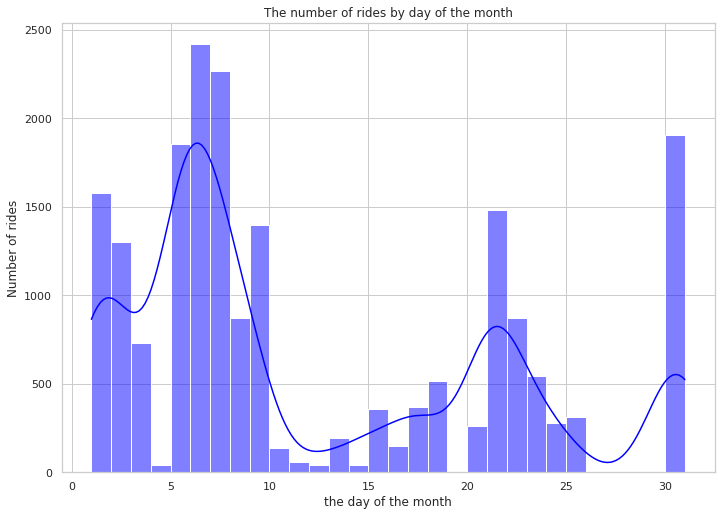

In [ ]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

sns.set_theme(style="whitegrid")

g = sns.histplot(
    data=trips.trip_start_month_day, kde= True,
     color='blue' , bins=30, ax=ax
)
#g.despine(left=True)

g.set_xlabel("the day of the month")
g.set_ylabel("Number of rides")
g.set_title("The number of rides by day of the month")

Text(0.5, 0, 'the day of the month')

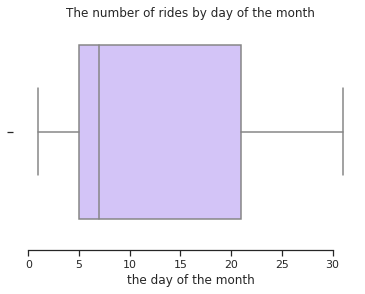

In [ ]:
sns.set_theme(style="ticks", palette="pastel")

ax = sns.boxplot( 
            x="trip_start_month_day", palette=["m", "g"], 
            data=trips)
sns.despine(offset=10, trim=True)
ax.set_title("The number of rides by day of the month")
ax.set_xlabel("the day of the month")




Comments: the city residents use more taxi in the beginning of the month, mostly around 7th.

The number of rides by the day of the week.




Text(0.5, 1.0, 'The number of rides by day of the week')

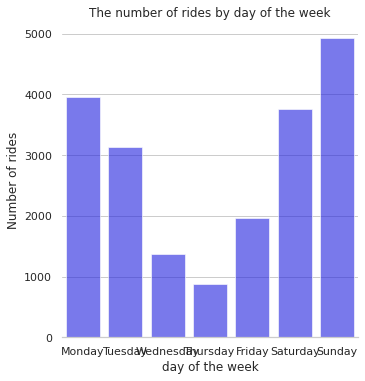

In [97]:
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=trips, kind="count",
    x="trip_start_week_day", 
    ci="sd", color='blue', alpha=.6, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
)
g.despine(left=True)

g.set_axis_labels("day of the week", "Number of rides")
g.ax.set_title("The number of rides by day of the week")

Comments: the city residents use less taxi in the middle the week.

The number of hourly rides during the day



Text(0.5, 1.0, 'The number of hourly rides')

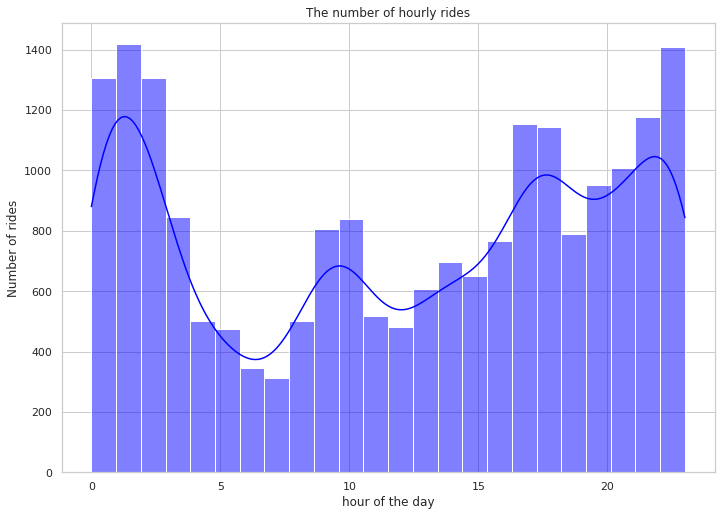

In [ ]:

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

sns.set_theme(style="whitegrid")

g = sns.histplot(
    data=trips.trip_start_day_hour, kde= True,
     color='blue' , bins=24, ax=ax
)

g.set_xlabel("hour of the day")
g.set_ylabel("Number of rides")
g.set_title("The number of hourly rides")

Comments: the city residents use taxi more during the rush hour(9-10h am & 17h-18h) and around mid-night. From 7am to mid-night, the uses of taxi increase.

(c) On a single plot, depict the taxi usage during different times of the day for cash and credit card rides. Add a suitable legend and label the axes.


In [ ]:
trips['payment_type'].unique()

array(['Credit Card', 'Cash', 'No Charge', 'Dispute', 'Unknown'],
      dtype=object)

Text(0.5, 1.0, 'The number of hourly rides per payment type')

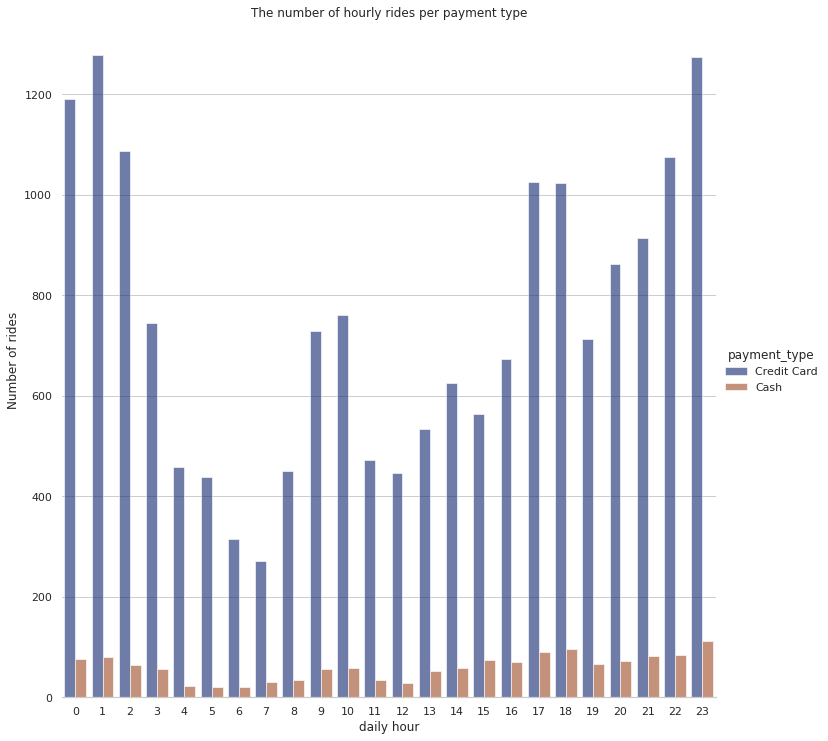

In [ ]:
sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=trips[(trips['payment_type'] == 'Credit Card') | (trips['payment_type'] == 'Cash')], kind="count",
    x="trip_start_day_hour", hue="payment_type",
    ci="sd", palette="dark", alpha=.6, height=10
)
g.despine(left=True)
g.set_axis_labels("daily hour", "Number of rides")
g.ax.set_title("The number of hourly rides per payment type")


(d) Overall it was noted that there were substantially more credit card rides than cash rides. Is this true throughout the day?

Yes. it is true.

## K-Nearest Neighbors

####Q4

**8 points** = $(1.5 + 2.5 + 2 + 2)$                

Consider the sample dataset given in the following table which represents samples from the selection for a certain tax-benefit scheme based on credit score (on 800) and annual income of individuals :

**Train set :**

Sample|Score (800)|Income($)|Result|
--|--|--|--|
T1|400|20000|Selected|
T2|200|2000|Rejected|
T3|600|10000|Selected|
T4|100|4000|Rejected|
T5|800|2000|Rejected|
T6|500|10000|Selected|


**Test set :**

Sample|Score (800)|Income($)|Result|
--|--|--|--|
A|200|12000|?|
B|600|2000|?|

(Note: The `Sample` column in the table is merely a unique name for each data sample to reference in the questions and your answers)

Consider a kNN model with k=1 and Euclidean L1 distance as the metric : $$L_1[(x_1, y_2) || (x_2, y_2)] = |x_1 - x_2| + |y_1 - y_2|$$

(a) For the two test samples `A` and `B`, determine the `Result` based on your manual fitting of the above model on the train set.

(b) In the raw data :
*  Convert the `Score` column as a percentage of the maximum possible credit score
*  Subtract the `Income` by the minimum income in the train set and divide this result by again using the minimum income. 

Recalibrate your kNN model and determine the `Result` of the model for the predictions of the test samples `A` and `B`.    

(c) Do you see a potential issue with fitting raw data like this to the kNN model? What is a reasonable solution?

(d) You discover many more attributes (features) about the individuals that you can include in your dataset and fit a model. Is kNN still a good choice in this case? **Why/Why not?**

(a)
L1[(A||T1)] = |200-400|+ |12000-20000| =8200

L1[(A||T2)] = |200-200|+ |12000-2000| =10000

L1[(A||T3)] = |200-600|+ |12000-10000| =4200

L1[(A||T4)] = |200-100|+ |12000-4000| =8100

L1[(A||T5)] = |200-800|+ |12000-2000| =10600

L1[(A||T6)] = |200-500|+ |12000-10000| =2300

T6 is the nearest neighbor, so Result of A is Selected.

L1[(B||T1)] = |600-400|+ |2000-20000| =8200

L1[(B||T2)] = |600-200|+ |2000-2000| =400

L1[(B||T3)] = |600-600|+ |2000-10000| =8000

L1[(B||T4)] = |600-100|+ |2000-4000| =2500

L1[(B||T5)] = |600-800|+ |2000-2000| =200

L1[(B||T6)] = |600-500|+ |2000-10000| =8100


T5 is the nearest neighbor, so Result of B is Rejected.

Sample|Score (800)|Income($)|Result|
--|--|--|--|
A|200|12000|Selected|
B|600|2000|Rejected|

(b)

Sample|percentage of the maximum possible credit score (%)|Income Transform|Result|
--|--|--|--|
T1|50|9|Selected|
T2|25|0|Rejected|
T3|75|4|Selected|
T4|12.5|1|Rejected|
T5|12.5|0|Rejected|
T6|62.5|4|Selected|
A|25|5|?|
B|75|0|?|

L1[(A||T1)] = |0.25-0.5|+ |5-9| =4.25

L1[(A||T2)] = |0.25-0.25|+ |5-0| =5.25

L1[(A||T3)] = |0.25-0.75|+ |5-4| =1.5

L1[(A||T4)] = |0.25-0.125|+ |5-1| =4.125

L1[(A||T5)] = |0.25-0.125|+ |5-0| =5.125

L1[(A||T6)] = |0.25-0.625|+ |5-4| =1.375

T6 is the nearest neighbor, so Result of A is Selected.

L1[(B||T1)] = |0.75-0.5|+ |0-9| =9.25

L1[(B||T2)] = |0.75-0.25|+ |0-0| =0.5

L1[(B||T3)] = |0.75-0.75|+ |0-4| =4

L1[(B||T4)] = |0.75-0.125|+ |0-1| =1.625

L1[(B||T5)] = |0.75-0.125|+ |0-0| =0.625

L1[(B||T6)] = |0.75-0.625|+ |0-4| =4.125


T2 is the nearest neighbor, so Result of B is Rejected.

Sample|percentage of the maximum possible credit score (%)|Income Transform|Result|
--|--|--|--|
A|25|5|Selected|
B|75|0|Rejected|

 (c)

The KNN did well with raw data, while the potential issues could be (1) the data can be very large or small numbers or nan which can create problems, given that k-NN relies on a distance metric. (2)  k-NN can be computationally expensive for especially large number of features and large data sets. (3) k = 1, the model has high capacity but can also be influenced by the new data.

The reasonable solution could be: transforming raw data into simpler input data space, rescaling, normalizing,  choosing carefully features and the distance metric, and tuning well k. 

(d)  kNN may NOT be the best choise, if we involve more features. 
As k-NN relies on a distance metric. The dimensionality of the data, the number of features (i.e., the relatively high number of predictors), which can create problems. k-NN can be computationally expensive for especially high dimensionality data and large data sets.

## Decision Trees

#### **Q5**

**5 points** = $(2.5 + 2.5)$

Consider the figure below :

  (a) Sketch the tree corresponding to the partition of the predictor space
illustrated in the left-hand panel. The numbers inside the boxes indicate the
mean of $Y$ within each region.                                                       

  (b) Create a diagram similar to the left-hand panel, using the tree illustrated in the right-hand panel. You should divide up the predictor space into the correct regions, and indicate the mean for each region.

<img width=600 src="https://i.ibb.co/PD3N5Zt/Trees.png" alt="Trees" border="0" /> 


(a)


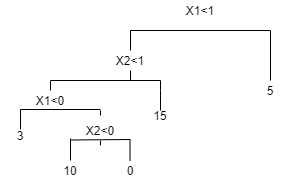

(b)

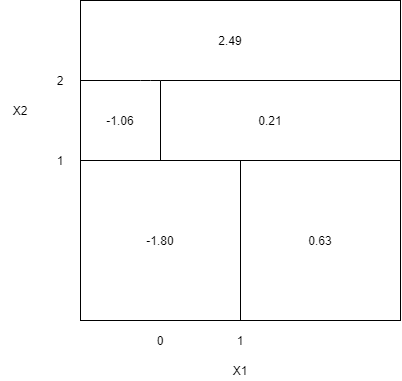

#### **Q6**

**13 points** = $(1 + 1 + 2 + 1.5 + 1.5 + 1.5 + 1.5 + 1 + 1 + 1)$                

Given below is a decision tree generated for a dataset with *150 samples* with :                             

*   features : `['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']`
*   target class labels : `['setosa', 'versicolor', 'virginica']`

The dataset consists of 50 samples per class.

<img width=650 src="https://i.ibb.co/gyLNf1v/decision-tree-figure.png" alt="Trees" border="0" /> 

Based on this particular decision tree, answer the following questions:

(a) Which among the 4 features do you think is the least significant in determining the class of the input data? **Why**?

(b) Which among the 4 features do you think is the most important in determining the class of the input data? **Why**?

(c) For each of the 3 classes, give approximate ranges of the feature values that are characteristic of the class based on the region in the partition space where a sample would **most likely occur** in the feature space (compared to other partitions). 
(Note: Need not specify all 4 features, only those that help identify the *most likely feature characteristics* are sufficient) 

(d) Why do some nodes have a gini index of 0 while the others do not?

(e) What are the possible class(es) you would classify the flowers with the following description into?:
1.  smaller sepals and petals  (width and length of both < 3.5 cm)
2.  longer sepals (longer than 6 cm) and wider petals (wider than 2 cm)   

(f) The field `value` actually represents the *number of samples of each class* `[#sentosa_samples, #versicolor_samples, #virginica_samples]` classified by the tree based on the given training dataset with 150 samples. With this in mind, determine the **number of samples in the training dataset that were classified into each class**. (`[setosa, versicolor, virginica] = [__, __, __]`)

(g) What is the *class-wise training accuracy* of the classification done by this tree? (training accuracy of each class)

(h) What is the *overall training accuracy* of this model?

(i) Do you think that this tree is overfitting the data? How would you determine it?  

(j) If you were required to fit a decision tree with lower variance, what change would you propose in the above tree?

**Answer**

(a) It seems "sepal width <= 3.1" is the least significant in determining the class of the input. because it is chosen near the end level of the decision tree, it means that other features are more significant for classification. And it find only 1 sample different. 


(b)It seems "petal length <= 2.45" is the most important in determining the class of the input. because it is the root of the decision tree, and it find only all the setosa. 

(c) Most likely feature characteristics:

setosa: petal length <= 2.45cm

versicolor: 2.45cm < petal length =4.75cm, sepal lenght <=6.15cm

virginica:petall leght> 2.45 cm ,sepal length> 6.15, petal width > 1.75 cm

(d)

The Gini index varies between values 0 and 1, where 0 expresses the purity of classification, i.e. All the nodes belong to a specified class or only one class exists there. And 1 indicates the random distribution of nodes across various classes. The value between values 0 and 1 shows nodes are over some classes.

(e)

1 smaller sepals and petals (width and length of both < 3.5 cm):

if patel length <=2.45, it's setosa.

otherwise it's versicolor.



2 longer sepals (longer than 6 cm) and wider petals (wider than 2 cm):

if petal length <= 2.45, it's setosa

if petal length <= 4.75, it's versicolor. 

if petal length > 4.75, this virginical.

(f)

the number of samples in the training dataset that were classified into each class. ([setosa, versicolor, virginica] = [50, 52, 48])

(g)

the class-wise training accuracy of the classification :
Accuracy(setosa) = 50/50 = 100%

Accuracy(versicolor) = 49/50 = 98%

Accuracy(virginical) = 47/50 = 94%





(h)

the overall training accuracy of this model:

Overall Accuracy: (50+49+47)/150 = 146/150= 97.3%



(i) I think this tree is overfitting the data. 

Because if we trim off the  "sepal width <= 3.1", only one sample is misclassified, this will slightly change the accuracy by only 0.7%. That is to say, the tree is overfitting. 

(j) I will prune the tree to make it shallow.

Because A complicated deep decision tree has low bias and high variance. The bias-variance tradeoff does depend on the depth of the tree. A shallower tree would have higher bias and lower variance that the same tree with higher depth. 

## Linear Regression

####**Q7**

**12 points** = $(1 + 2 + 1 + 2 + 1.5 + 1.5 + 2 + 1)$                           

You are building a model of bike rental demand, to help a city plan its
transit services. After analyzing the dataset, you make the following plot,

  <img width=600 src="https://i.ibb.co/n3Tpy6J/bike-rentals-by-time-of-day.png"/>

  The x-axis shows the time of day ($x$), and the y-axis gives the **average** number of bike rentals ($\bar{y}$), both of which are derived from a dataset containing the instantaneous number bike rentals ($y$) at a city location for different times of the day with the resolution in minutes. Note that you only plot the average number of bike rentals for the purpose of visualization. For fitting a model, you use the raw $x$ and $y$ available in the dataset.  

The software architects of this project are very persistent on using a linear model for this demand prediction due to computational constraints and to ensure swift processing. Answer the following questions based on this.


  (a) You first feel the impulse to fit the model, $$y
= \beta x + \epsilon.$$ Is it a good idea to do so? Why/Why not? 


  (b) Propose a good way to represent the time of day feature variable (x-axis) to include in the regression. **Justify** your choice.

  (c) A data scientist in your team proposes to include an additional feature variable $x_d$ which is set to 1 for *weekday* (Mon-Fri) and 0 for *weekend* (Sat-Sun). Explain what could possibly be the basis of this choice.  

  (d) You fit a linear model for the dataset that is augmented with the additional variable $x_d$ as proposed in (c) above as $y = \beta x + \beta_d x_d + \epsilon$. One of the regression coefficients of this model is $\beta_d$. Intuitively explain what this parameter $\beta_d$ would end up representing in **this specific** fitted linear model.  

  (e) When a linear model is fit separately for the *weekday* and *weekend* data, which one among the two (weekday/weekend) will produce a better fit model? Why?

  (f) For the **weekend** data, you realize that you can split the input domain into specific ranges and fit separate linear models to get better results. Outline a good possible set of ranges to split the input for the *weekend* data. 

  (g) Motivated by this approach, you realize you can include basis functions in your
regression even for the **weekday** data. Suggest one possible set of basis functions you might include in this regression. What is the idea behind your choice?

  (h) Describe one way that you would use to avoid your linear model from overfitting the bike rental data.



**Answer**

(a)

I don't think it's good idea, because obviously a straight line such as $y
= \beta x + \epsilon$ can't fit well those curves, it can not capture the underlying structure of the data. The model is underfited. 
 

(b) These curves look like polynomial graph. We can firstly, convert time to format 24 based hour, then we could do degree-3 polynomial features trainfromation 

(c) 

Visually,
the weekend data structure is different from the weekdays, i.e, the weekend has less rent then week day, "rush hour" is later too.

An additional feature variable $x_d$  is set to 1 for *weekday* (Mon-Fri) and 0 for *weekend* (Sat-Sun). 

This variable works like a switch, on and off. 
 
It is for seperating the model on weekday and the weekend data. 


(d)The  additional feature variable $x_d$  is set to 1 for *weekday* (Mon-Fri) and 0 for *weekend* (Sat-Sun). 

Then the model will become: 

$y = \beta x + \beta_d  + \epsilon $ if weekday

$y = \beta x  + \epsilon $ if weekend

It is for seperating the weekday model and the weekend model. 

And weekday model is similar to weekend model, but is shift (up/ down / left /right) according to $\beta_d$. $\beta_d$ discribes the difference between weekdays and weekend.


(e) Visually, based on the plot, the weekday data looks more complicated than weekend data. 

The model with lower capacity can fit weekend data well, while it can underfit the weekend data.

The model with higher capacity can fit weekday data well, while it can overfit the weekend data. 
It depends on this linear model capacity. 

If it's the simple linear function in (d) with lower capacity, the weekend data will produce the better fit model. 

(f) we can separate the weekend data from the weekday data, if day of the week == ['Sunday', 'Saturday'], it's weekend.

(g)I would include polynomial basis functions with degree 3 or 4,
$f(x) = \sum_{i=0}^P\theta_i \phi_i(x) = \theta_0 + \theta_1x + \theta_2x^2 + . . . + \theta_P x^P $, $P$ = 3 or 4
Because the data structure looks like polynomial function.

(h)We can detect overfitting by determining whether your model fits new data as well as it fits the data used to estimate the model. So cross-validation should be used to avoid the linear model from overfitting. 

